# Lab 8 : Star Formation 

In [32]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import Latex
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [33]:
def StarFormationRate(L, Type, TIR=0):
    '''
    Function that computes the star formation rate of a galaxy 
    following Kennicutt & Evans 2012 Eqn 12 (ARA&A 50)

    INPUTS
    ------
        L: 'float'
            Luminosity of the galaxy in a given waveband (erg/s)
        Type: 'string'
            The wavelength: 'FUV', 'NUV', 'TIR', 'Halpha'
        TIR: 'float'
            Total Infrared Luminosity in erg/s (default=0)

    OUTPUTS
    -------
        SFR: 'float' 
            Log of the star formation rate (Msun/yr)
    '''

    if (Type == 'FUV'):
        logCx = 43.35 # Calibration from Table 1 (K&E 12)
        TIRc = 0.46 # Correction for dust asbsorption from Table 2 (K&E 12)
    elif (Type == 'NUV'):
        logCx = 43.17 
        TIRc = 0.27 
    elif (Type == 'Halpha'):
        logCx = 41.27 
        TIRc = 0.0024 
    elif (Type == 'TIR'):
        logCx = 43.41 
        TIRc = 0.0 
    else:
        print('Missing Wavelength: FUV, NUV, Halpha, TIR')
    
    # Correct the luminosity for dust using TIR
    Lnew = L + TIRc*TIR

    # Star formation rate
    SFR = np.log10(Lnew) - logCx

    return SFR


Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [34]:
LsunErgS = const.L_sun.to(u.erg/u.s).value

In [35]:
#  WLM Dwarf Irregular Galaxy
# From NED: WLM NUV luminosity 1.71e+7 Lsun
# From NED: WLM NIR luminosity 2.48e+6 Lsun
# From NED: WLM FIR luminosity 7.84e+5 Lsun

NUV_WLM = 1.71e+7*LsunErgS
TIR_WLM = 2.48e+6*LsunErgS + 7.84e+5*LsunErgS
print(StarFormationRate(NUV_WLM, 'NUV', TIR_WLM))


-2.3322074670824904


In [36]:
#  N24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [37]:
def SFRMainSequence(Mstar, z):
    ''' 
    This is a function that computes the avg. SFR of a galaxy 
    as a function of stella mass.

    INPUTS
    ------
        Mstar: 'float' 
            Stellar mass of the galaxy in Msun
        z: 'float' 
            Redshift
    
    OUTPUTS
    -------
        logSFR: 'float' 
            log(SFR) (Msun/yr)
    '''

    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2

    logSFR = alpha*(np.log10(Mstar) - 10.5) + beta

    return logSFR


# Step 2

In [38]:
# MW at z=0

MW_disk = 8e10

print(10**SFRMainSequence(MW_disk, 0))


4.5937038237959715


In [39]:
# MW at z = 1

print(10**SFRMainSequence(MW_disk, 1))

36.287854588142594


# Step 3

In [40]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)


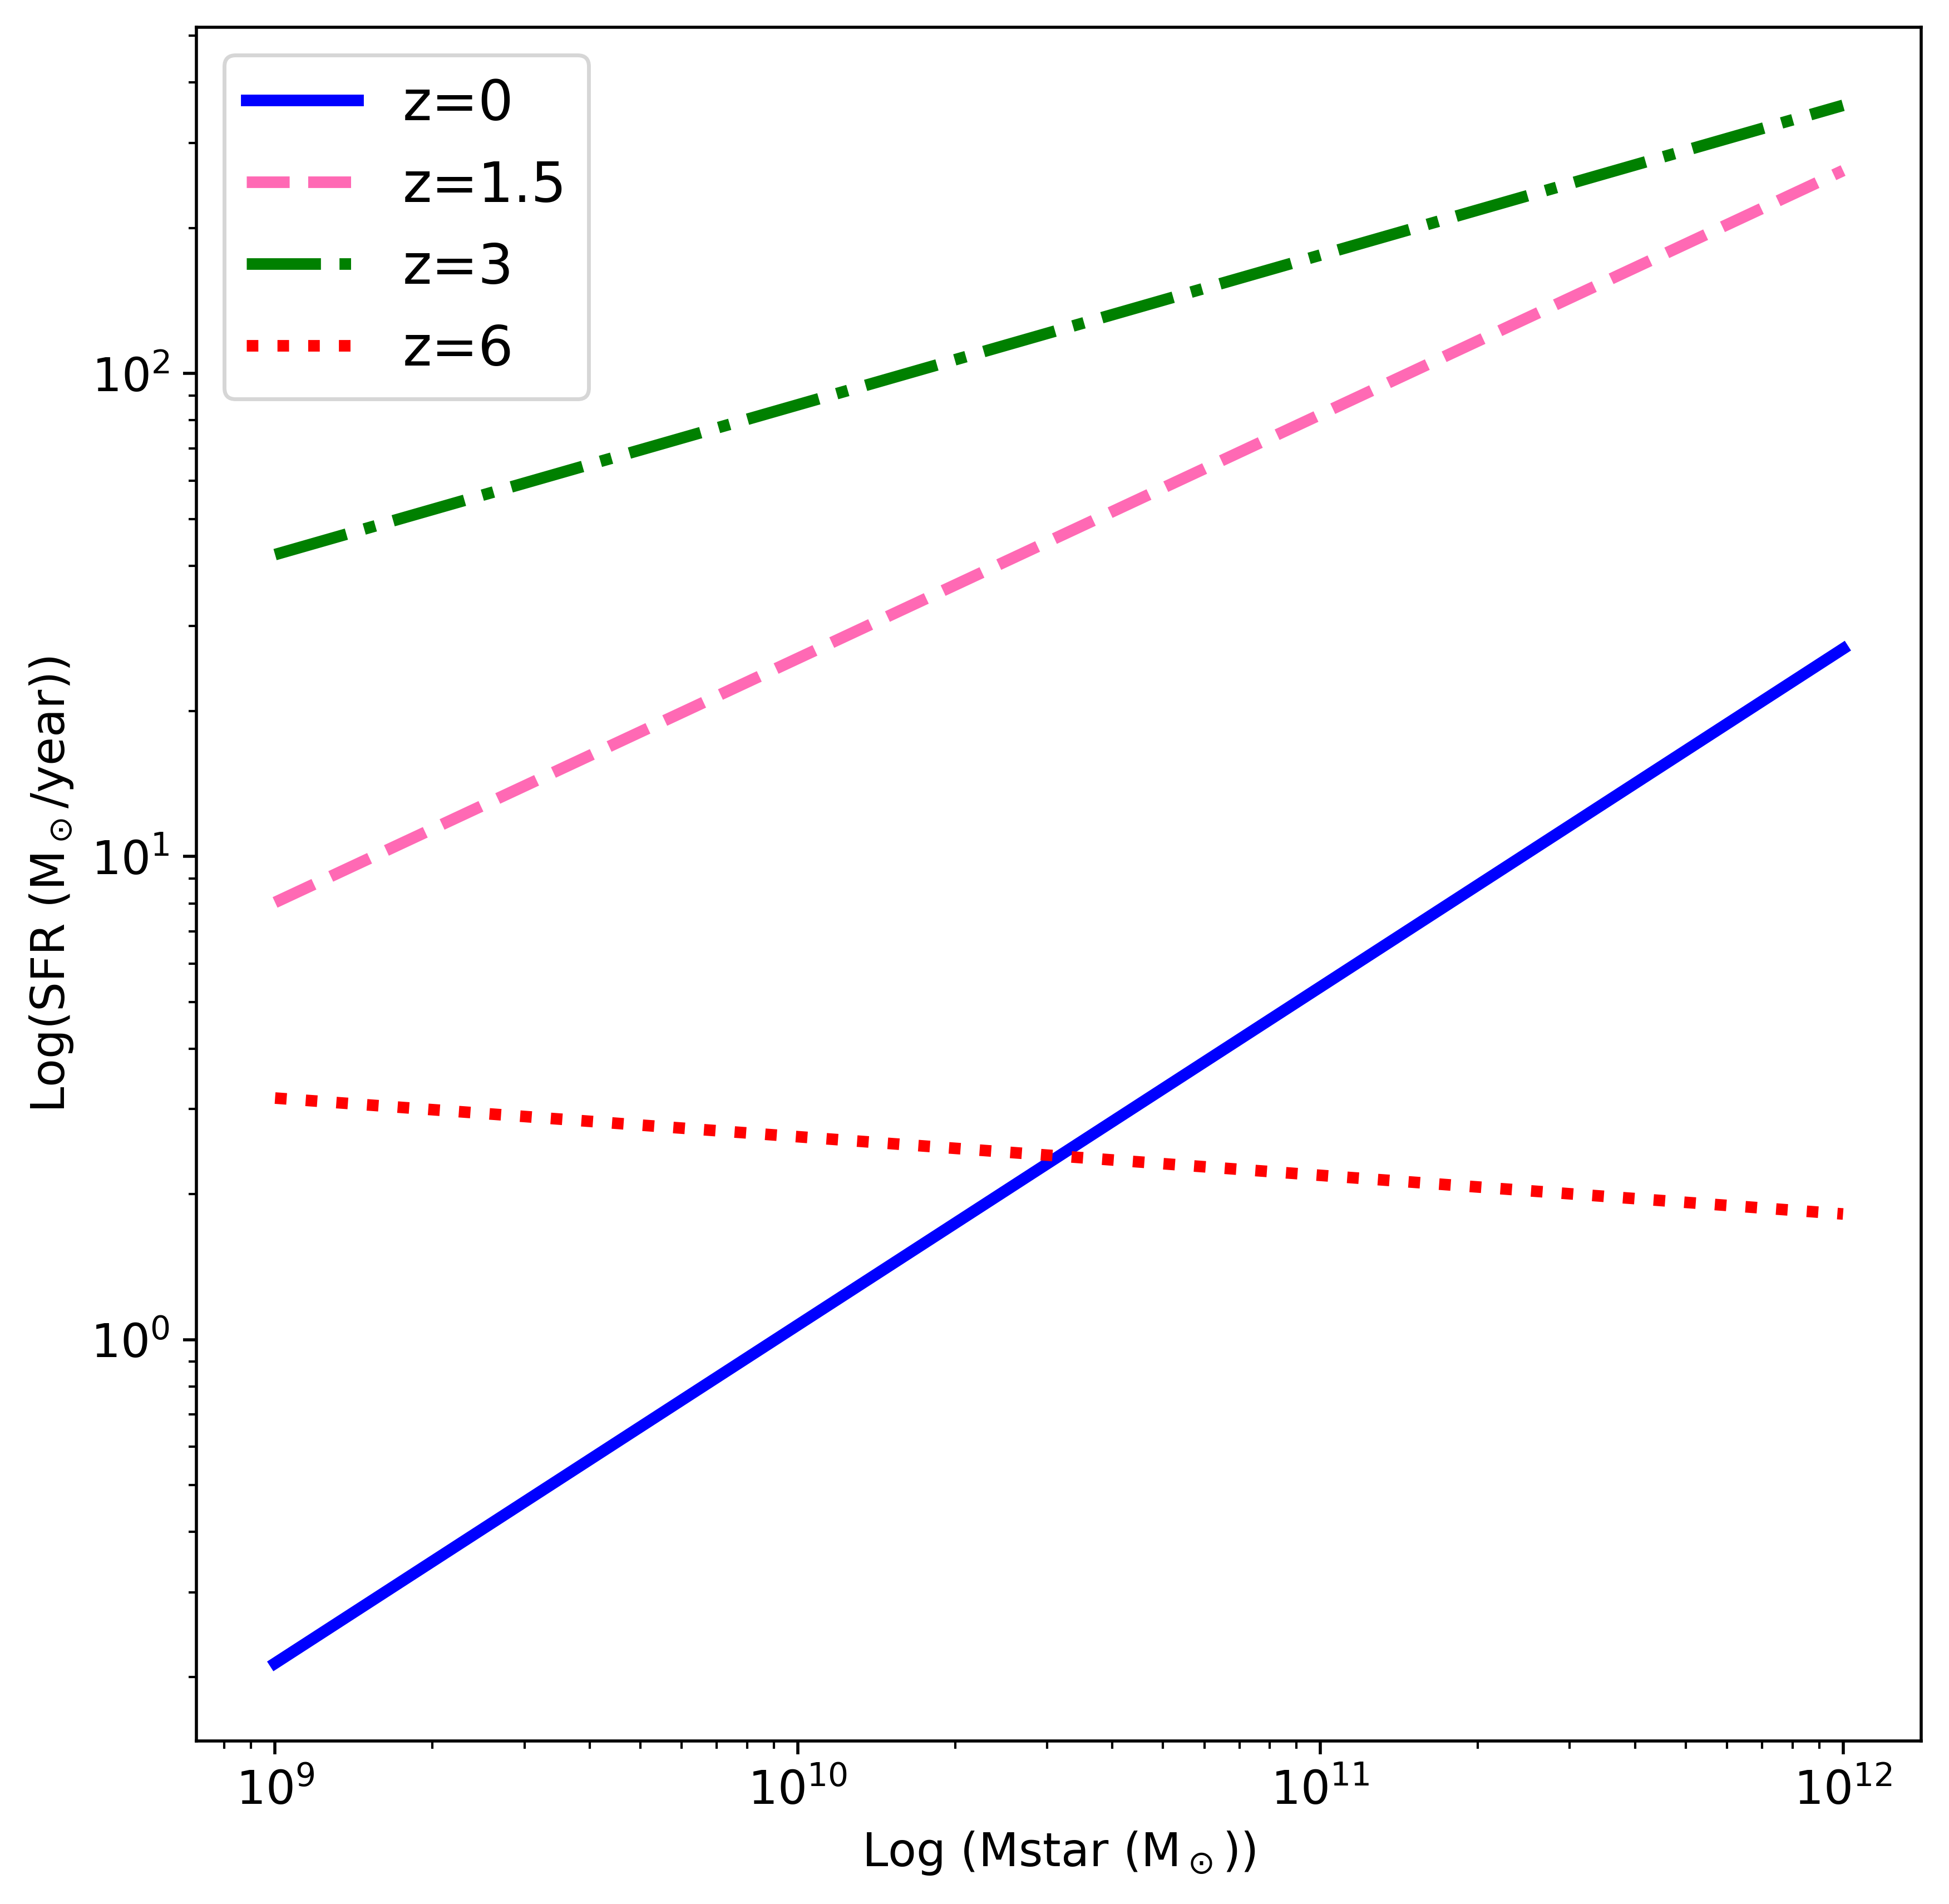

In [41]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0), color='blue', linewidth=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1.5), color='hotpink', linewidth=3, label='z=1.5', linestyle='--')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3), color='green', linewidth=3, label='z=3', linestyle='-.')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 6), color='red', linewidth=3, label='z=6', linestyle=':')



# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [46]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS
print(10**StarFormationRate(TIR_Normal, 'TIR'))

1.4892648150381245


In [47]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS
print(10**StarFormationRate(TIR_LIRG, 'TIR'))

14.892648150381245


In [48]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS
print(10**StarFormationRate(TIR_ULIRG, 'TIR'))

148.92648150381245


In [49]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS
print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244
